In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Sample synthetic dataset, 1=Apple, -1=Orange
# Generate 40 additional random data points (20 per class)

def get_data(n):
    rand_samples = n
    samples = []

    # Generating random samples for class 1 (Apple)
    for _ in range(rand_samples // 2):
        redness = np.random.randint(200, 255)
        weight = np.random.randint(100, 140)
        samples.append([redness, weight, 1])

    # Generating random samples for class -1 (Orange)
    for _ in range(rand_samples // 2):
        redness = np.random.randint(10, 50)
        weight = np.random.randint(80, 100)
        samples.append([redness, weight, -1])

    return np.array(samples)


In [9]:
data = get_data(50)
print(data)

[[248 125   1]
 [219 131   1]
 [229 120   1]
 [239 129   1]
 [222 101   1]
 [245 135   1]
 [246 103   1]
 [239 123   1]
 [215 121   1]
 [251 112   1]
 [204 130   1]
 [210 124   1]
 [253 114   1]
 [229 118   1]
 [228 132   1]
 [233 113   1]
 [216 137   1]
 [217 131   1]
 [241 119   1]
 [226 110   1]
 [240 128   1]
 [228 113   1]
 [242 107   1]
 [209 100   1]
 [229 107   1]
 [ 23  88  -1]
 [ 47  86  -1]
 [ 32  83  -1]
 [ 47  93  -1]
 [ 46  94  -1]
 [ 36  99  -1]
 [ 41  89  -1]
 [ 26  83  -1]
 [ 42  86  -1]
 [ 46  90  -1]
 [ 12  82  -1]
 [ 28  80  -1]
 [ 37  89  -1]
 [ 18  91  -1]
 [ 40  94  -1]
 [ 35  88  -1]
 [ 36  89  -1]
 [ 24  81  -1]
 [ 49  91  -1]
 [ 24  81  -1]
 [ 14  94  -1]
 [ 12  91  -1]
 [ 37  91  -1]
 [ 10  80  -1]
 [ 21  80  -1]]


In [10]:
data.shape

(50, 3)

In [11]:

# Separate features (redness and weight) and labels (fruit type)
X = data[:, :2]
y = data[:, 2]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KNN classifier with k=1
knn_classifier = KNeighborsClassifier(n_neighbors=2)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

print(X_test)
# Predict the fruit types for the test data
y_pred = knn_classifier.predict(X_test)
print(y_pred)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[[229 118]
 [ 40  94]
 [ 36  99]
 [ 14  94]
 [217 131]
 [ 10  80]
 [ 47  86]
 [ 23  88]
 [ 26  83]
 [226 110]
 [253 114]
 [222 101]
 [ 37  89]
 [215 121]
 [239 129]]
[ 1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1  1  1]
Accuracy: 1.0


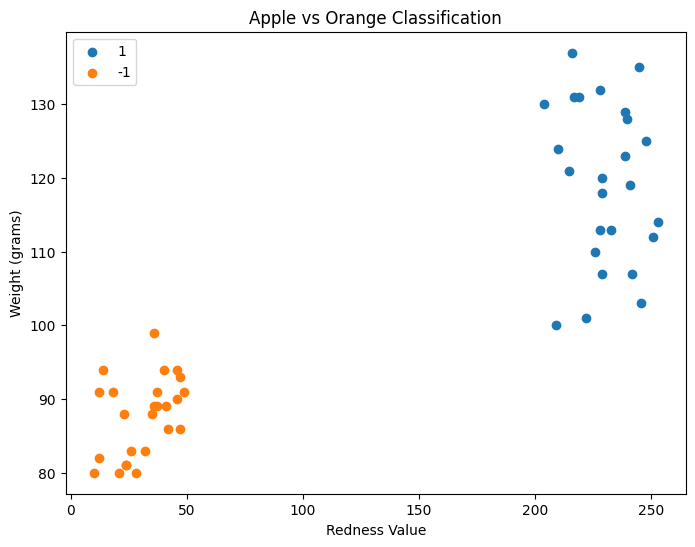

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Convert the data to a pandas DataFrame for visualization
df = pd.DataFrame(data, columns=['Redness', 'Weight', 'Fruit Type'])

# Plot the data samples
plt.figure(figsize=(8, 6))
for fruit_type in df['Fruit Type'].unique():
    subset = df[df['Fruit Type'] == fruit_type]
    plt.scatter(subset['Redness'], subset['Weight'], label=fruit_type)

plt.xlabel('Redness Value')
plt.ylabel('Weight (grams)')
plt.title('Apple vs Orange Classification')
plt.legend()
plt.show()


In [13]:
data_1 = get_data(50)
print(data_1)

[[253 122   1]
 [230 138   1]
 [234 139   1]
 [208 134   1]
 [221 117   1]
 [214 132   1]
 [206 120   1]
 [210 135   1]
 [245 125   1]
 [237 119   1]
 [221 128   1]
 [202 134   1]
 [212 127   1]
 [225 123   1]
 [245 136   1]
 [236 101   1]
 [227 122   1]
 [203 122   1]
 [234 133   1]
 [239 101   1]
 [239 107   1]
 [214 122   1]
 [210 123   1]
 [200 101   1]
 [250 115   1]
 [ 10  86  -1]
 [ 19  82  -1]
 [ 38  91  -1]
 [ 40  81  -1]
 [ 49  88  -1]
 [ 45  92  -1]
 [ 38  98  -1]
 [ 29  81  -1]
 [ 28  82  -1]
 [ 23  80  -1]
 [ 10  80  -1]
 [ 21  98  -1]
 [ 15  83  -1]
 [ 20  80  -1]
 [ 17  83  -1]
 [ 11  83  -1]
 [ 22  86  -1]
 [ 44  92  -1]
 [ 16  83  -1]
 [ 28  91  -1]
 [ 37  92  -1]
 [ 14  99  -1]
 [ 42  85  -1]
 [ 27  96  -1]
 [ 12  92  -1]]


In [14]:
# Separate features (redness and weight) and labels (fruit type)
X = data_1[:, :2]
y = data_1[:, 2]

# Split dataset into training (80%), testing (10%), and validation (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create a KNN classifier with k=1
knn_classifier = KNeighborsClassifier(n_neighbors=2)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

print(X_test)
# Predict the fruit types for the test data
y_pred = knn_classifier.predict(X_test)
print(y_pred)

# Calculate the accuracy of the model on the validation set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[[ 45  92]
 [239 101]
 [203 122]
 [ 37  92]
 [ 19  82]]
[-1  1  1 -1 -1]
Accuracy: 1.0


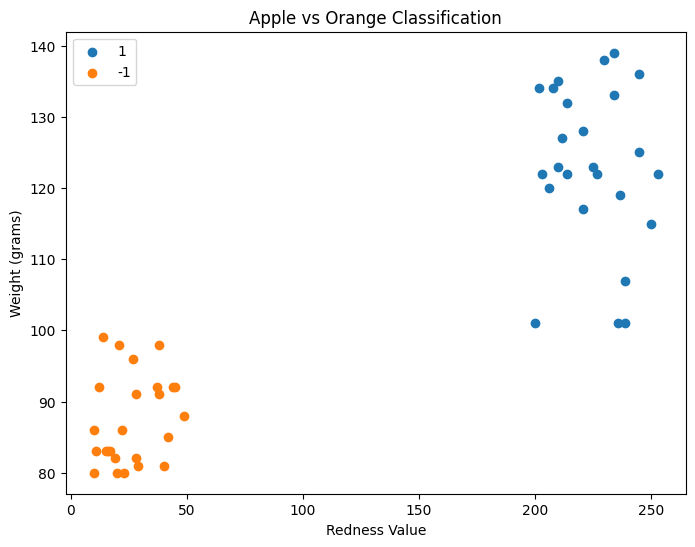

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Convert the data to a pandas DataFrame for visualization
df = pd.DataFrame(data_1, columns=['Redness', 'Weight', 'Fruit Type'])

# Plot the data samples
plt.figure(figsize=(8, 6))
for fruit_type in df['Fruit Type'].unique():
    subset = df[df['Fruit Type'] == fruit_type]
    plt.scatter(subset['Redness'], subset['Weight'], label=fruit_type)

plt.xlabel('Redness Value')
plt.ylabel('Weight (grams)')
plt.title('Apple vs Orange Classification')
plt.legend()
plt.show()


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Sample synthetic dataset, 1=Apple, -1=Orange
# Generate 40 additional random data points (20 per class)

def get_data(n):
    rand_samples = n
    samples = []

    # Generating random samples for class 1 (Apple)
    for _ in range(rand_samples // 2):
        redness = np.random.randint(200, 255)
        weight = np.random.randint(100, 140)
        samples.append([redness, weight, 1])

    # Generating random samples for class -1 (Orange)
    for _ in range(rand_samples // 2):
        redness = np.random.randint(10, 50)
        weight = np.random.randint(80, 100)
        samples.append([redness, weight, -1])

    return np.array(samples)

data_2 = get_data(50)
print(data_2)

# Separate features (redness and weight) and labels (fruit type)
X = data_2[:, :2]
y = data_2[:, 2]

# Split dataset into training (80%), testing (10%), and validation (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Values of k to try
k_values = [3, 5, 7]

for k in k_values:
    # Create a KNN classifier with the current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data
    knn_classifier.fit(X_train, y_train)

    # Predict the fruit types for the validation data
    y_pred_val = knn_classifier.predict(X_val)

    # Calculate the accuracy of the model on the validation set
    accuracy_val = accuracy_score(y_val, y_pred_val)
    print(f"Validation Accuracy (k={k}):", accuracy_val)

    # Predict the fruit types for the test data
    y_pred_test = knn_classifier.predict(X_test)

    # Calculate the accuracy of the model on the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f"Test Accuracy (k={k}):", accuracy_test)
    print()


[[222 136   1]
 [214 129   1]
 [251 103   1]
 [213 117   1]
 [220 101   1]
 [219 101   1]
 [227 108   1]
 [224 108   1]
 [216 124   1]
 [204 117   1]
 [242 130   1]
 [250 106   1]
 [217 104   1]
 [237 101   1]
 [253 106   1]
 [215 104   1]
 [248 137   1]
 [214 125   1]
 [229 129   1]
 [234 103   1]
 [254 106   1]
 [204 106   1]
 [237 115   1]
 [203 103   1]
 [200 123   1]
 [ 28  80  -1]
 [ 40  94  -1]
 [ 48  90  -1]
 [ 41  94  -1]
 [ 48  88  -1]
 [ 18  98  -1]
 [ 24  87  -1]
 [ 27  82  -1]
 [ 44  91  -1]
 [ 43  93  -1]
 [ 10  96  -1]
 [ 30  87  -1]
 [ 14  87  -1]
 [ 13  81  -1]
 [ 36  87  -1]
 [ 37  93  -1]
 [ 14  82  -1]
 [ 38  97  -1]
 [ 31  95  -1]
 [ 24  84  -1]
 [ 48  86  -1]
 [ 49  94  -1]
 [ 28  99  -1]
 [ 25  96  -1]
 [ 14  94  -1]]
Validation Accuracy (k=3): 1.0
Test Accuracy (k=3): 1.0

Validation Accuracy (k=5): 1.0
Test Accuracy (k=5): 1.0

Validation Accuracy (k=7): 1.0
Test Accuracy (k=7): 1.0



[[206 137   1]
 [209 109   1]
 [238 121   1]
 [224 124   1]
 [226 108   1]
 [252 128   1]
 [230 110   1]
 [225 131   1]
 [214 113   1]
 [230 127   1]
 [233 104   1]
 [221 106   1]
 [243 128   1]
 [253 126   1]
 [238 125   1]
 [201 127   1]
 [237 114   1]
 [205 139   1]
 [208 128   1]
 [227 123   1]
 [204 118   1]
 [249 125   1]
 [226 137   1]
 [249 133   1]
 [223 109   1]
 [ 25  83  -1]
 [ 38  83  -1]
 [ 14  96  -1]
 [ 27  96  -1]
 [ 12  90  -1]
 [ 48  92  -1]
 [ 28  90  -1]
 [ 13  94  -1]
 [ 10  88  -1]
 [ 49  99  -1]
 [ 25  85  -1]
 [ 44  87  -1]
 [ 47  87  -1]
 [ 18  91  -1]
 [ 31  86  -1]
 [ 12  82  -1]
 [ 38  95  -1]
 [ 42  94  -1]
 [ 10  89  -1]
 [ 26  85  -1]
 [ 26  85  -1]
 [ 31  96  -1]
 [ 23  87  -1]
 [ 43  96  -1]
 [ 12  90  -1]]
Validation Accuracy (k=3): 1.0
Confusion Matrix (Validation):
[[4 0]
 [0 1]]


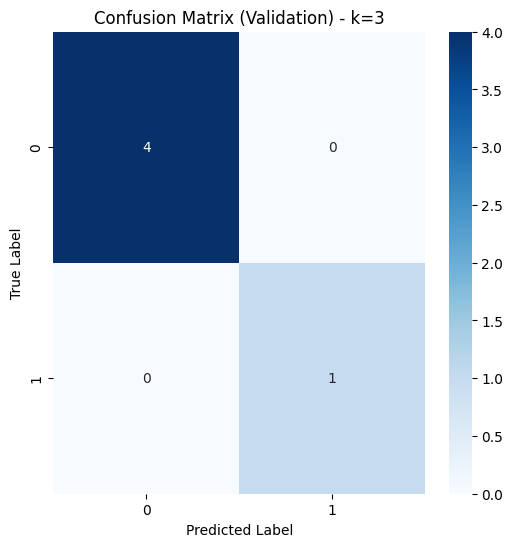


Validation Accuracy (k=5): 1.0
Confusion Matrix (Validation):
[[4 0]
 [0 1]]


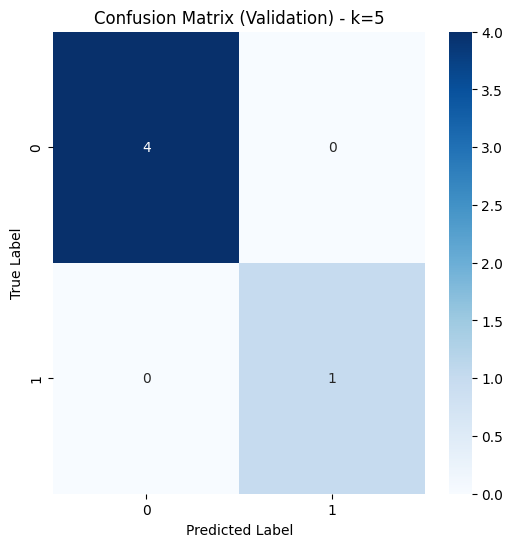


Validation Accuracy (k=7): 1.0
Confusion Matrix (Validation):
[[4 0]
 [0 1]]


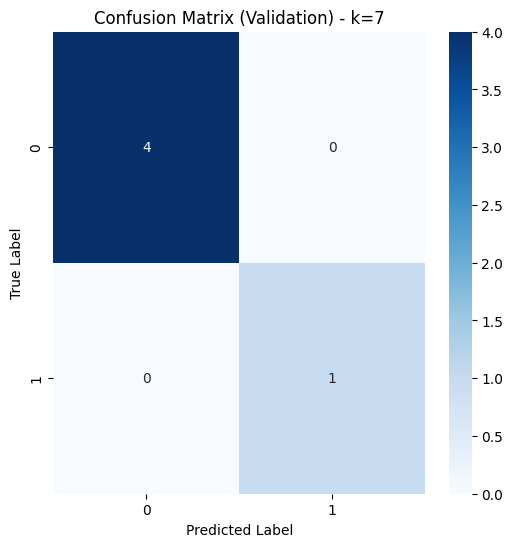

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Sample synthetic dataset, 1=Apple, -1=Orange
# Generate 40 additional random data points (20 per class)

def get_data(n):
    rand_samples = n
    samples = []

    # Generating random samples for class 1 (Apple)
    for _ in range(rand_samples // 2):
        redness = np.random.randint(200, 255)
        weight = np.random.randint(100, 140)
        samples.append([redness, weight, 1])

    # Generating random samples for class -1 (Orange)
    for _ in range(rand_samples // 2):
        redness = np.random.randint(10, 50)
        weight = np.random.randint(80, 100)
        samples.append([redness, weight, -1])

    return np.array(samples)

data_3 = get_data(50)
print(data_3)

# Separate features (redness and weight) and labels (fruit type)
X = data_3[:, :2]
y = data_3[:, 2]

# Split dataset into training (80%), testing (10%), and validation (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Values of k to try
k_values = [3, 5, 7]

for k in k_values:
    # Create a KNN classifier with the current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data
    knn_classifier.fit(X_train, y_train)

    # Predict the fruit types for the validation data
    y_pred_val = knn_classifier.predict(X_val)

    # Calculate the accuracy of the model on the validation set
    accuracy_val = accuracy_score(y_val, y_pred_val)
    print(f"Validation Accuracy (k={k}):", accuracy_val)

    # Calculate the confusion matrix for validation set
    cm_val = confusion_matrix(y_val, y_pred_val)
    print("Confusion Matrix (Validation):")
    print(cm_val)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix (Validation) - k={k}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    print()
